# Python Imports

In [ ]:
import pandas as pd                     # for data manipulation and analysis

%matplotlib inline
import matplotlib.pyplot as plt        # object-oriented API for embedding plots into applications

import matplotlib                       
import numpy as np                     # used for working with arrays
import missingno as msno               # provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe
import altair as alt                   # statistical visualization library
from vega_datasets import data         


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import re
from sklearn.base import BaseEstimator, TransformerMixin
import nltk.stem

# Data Set

In [ ]:
df = pd.read_csv('/content/charity_navigator.csv.txt')
df.head()

Unnamed: 0                 category                               cause  \
0           0  arts culture humanities                             museums   
1           1                   health  diseases disorders and disciplines   
2           2                   health          patient and family support   
3           3           human services                     social services   
4           4                  animals                  zoos and aquariums   

   charityid                                            mission  \
0       9745  the utah museum of contemporary art advances a...   
1       8857  the national mps society exists to find cures ...   
2      14464  the ronald mcdonald house of san francisco rmh...   
3       4177  the mission of the national federation of the ...   
4       3718  the oldest zoo in texas the fort worth zoo was...   

                                             tagline  
0           utah premiere venue for contemporary art  
1             support for families research for cure  
2                          the house that love built  
3                             live the life you want  
4  strengthening the bond between humans and the ...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9119 non-null   int64 
 1   category    9119 non-null   object
 2   cause       9119 non-null   object
 3   charityid   9119 non-null   int64 
 4   mission     8654 non-null   object
 5   tagline     8699 non-null   object
dtypes: int64(2), object(4)
memory usage: 427.6+ KB


# Preprocess and Explore Data 

## Uniformative Columns

In [ ]:
print(df.columns)
df.drop(['Unnamed: 0','charityid'], axis=1, inplace=True)     #no. ofcols available and which are dropped 
df.head()

Index(['Unnamed: 0', 'category', 'cause', 'charityid', 'mission', 'tagline'], dtype='object')


category                               cause  \
0  arts culture humanities                             museums   
1                   health  diseases disorders and disciplines   
2                   health          patient and family support   
3           human services                     social services   
4                  animals                  zoos and aquariums   

                                             mission  \
0  the utah museum of contemporary art advances a...   
1  the national mps society exists to find cures ...   
2  the ronald mcdonald house of san francisco rmh...   
3  the mission of the national federation of the ...   
4  the oldest zoo in texas the fort worth zoo was...   

                                             tagline  
0           utah premiere venue for contemporary art  
1             support for families research for cure  
2                          the house that love built  
3                             live the life you want  
4  strengthening the bond between humans and the ...

In [ ]:
len(df['cause'].unique())

37

## **Missing** Rows

### Visualize Missing Rows

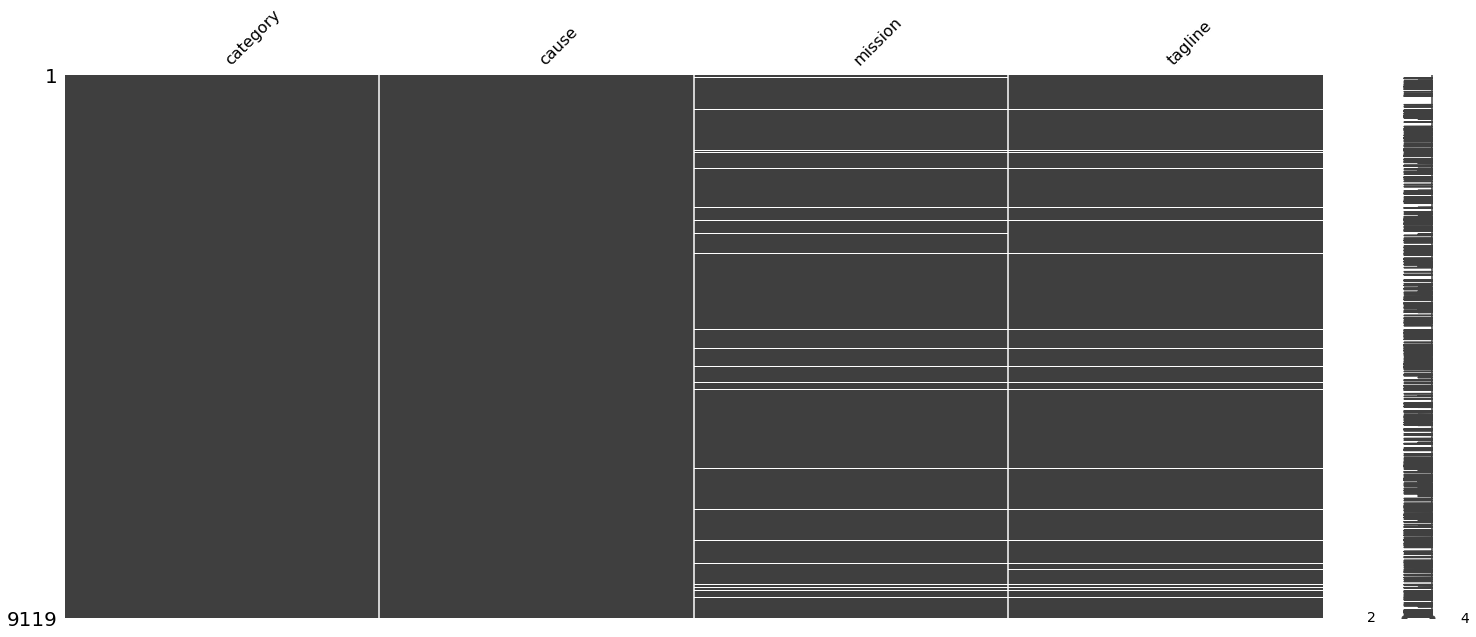

In [ ]:
msno.matrix(df)

### Drop Missing Rows

In [ ]:
## Drop Empty Rows
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8638 entries, 0 to 9118
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  8638 non-null   object
 1   cause     8638 non-null   object
 2   mission   8638 non-null   object
 3   tagline   8638 non-null   object
dtypes: object(4)
memory usage: 337.4+ KB


## Check Class Balance

We can upsample to handle the class imbalance or use an algorithm (e.g.: Tree-based) that is insensitve to the class imbalance.

In [ ]:
df['cause'].value_counts()

social services                                             701
performing arts                                             559
youth development shelter and crisis services               559
museums                                                     397
united ways                                                 395
development and relief services                             388
advocacy and education                                      370
children and family services                                356
youth education programs and services                       335
homeless services                                           334
environmental protection and conservation                   325
religious activities                                        317
animal rights welfare and services                          314
patient and family support                                  296
diseases disorders and disciplines                          249
housing and neighborhood development    

In [ ]:
pic = pd.DataFrame(df['category'].value_counts())

In [ ]:
pic['name'] = pic.index.values.tolist()

In [ ]:
pic                  #add visualization in report and ppt

category                        name
human services                  2430              human services
arts culture humanities         1228     arts culture humanities
health                           894                      health
community development            807       community development
education                        671                   education
international                    626               international
animals                          485                     animals
religion                         465                    religion
environment                      447                 environment
human and civil rights           370      human and civil rights
research and public policy       215  research and public policy

In [ ]:
source = pic

bars = alt.Chart(source).mark_bar().encode(
     x='category:Q',
     y=alt.Y(
        "name:O",
        sort=alt.EncodingSortField(
            field="category",  # The field to use for the sort
            #op="sum",  # The operation to run on the field prior to sorting
            order="ascending"  # The order to sort in
        )
    )
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='category:Q'
)

(bars + text).properties(height=200)    

alt.LayerChart(...)

### Up-sampling & down-sampling to make the classes balanced. 

In [ ]:
# example of sampling

df.sample(4, random_state=1)

category                                  cause  \
4558               education  youth education programs and services   
7181  human and civil rights                 advocacy and education   
2031           international           humanitarian relief supplies   
7943                religion                   religious activities   

                                                mission  \
4558  since 1945 junior achievement of southeast tex...   
7181  the friends committee on national legislation ...   
2031  vision is our mission restoring vision to peop...   
7943  the mission of orphan helpers is to serve and ...   

                                                tagline  
4558  junior achievement empowering young people to ...  
7181  bringing quaker perspectives to public policy ...  
2031                     our vision is restoring theirs  
7943                     today orphans tomorrow helpers

In [ ]:
# max_size = df['category'].value_counts().max()

threshold = 671

In [ ]:
lst = []

for class_index, group in df.groupby('category'):
    if (threshold - len(group) > 0): # oversample
        lst.append(group)
        lst.append(group.sample(threshold - len(group), replace=True, random_state=1))

    elif (threshold - len(group) < 0): # under-sample
        lst.append(group.sample(threshold, replace=True, random_state=1))

    else:
        lst.append(group)

    print(class_index, threshold - len(group))
    # lst.append(group.sample(threshold - len(group), replace=True, random_state=1))

animals 186
arts culture humanities -557
community development -136
education 0
environment 224
health -223
human and civil rights 301
human services -1759
international 45
religion 206
research and public policy 456


In [ ]:
df_balanced = pd.concat(lst)

In [ ]:
df_balanced['category'].value_counts()

animals                       671
arts culture humanities       671
community development         671
education                     671
environment                   671
health                        671
human and civil rights        671
human services                671
international                 671
religion                      671
research and public policy    671
Name: category, dtype: int64

# Subset Data for Analysis

Use a subset of the data for analysis

In [ ]:
target_lst = ['animals', 'arts culture humanities' ,'community development',
              'education','environment']

In [ ]:
df_balanced = df_balanced.loc[df_balanced['category'].isin(target_lst)]

# Extraction Features

## Encode Target 


In [ ]:
target = 'category'

le = preprocessing.LabelEncoder()
le.fit(df[target])
#print(le.classes_)
df_balanced['target'] = le.transform(df_balanced[target]) 
df_balanced['target'].value_counts()[0:10]

0    671
1    671
2    671
3    671
4    671
Name: target, dtype: int64

In [ ]:
len(df_balanced['category'].unique())

5

## Apply Custom Analyzer

The data set contains many mention to year and organization was founded, which we will not be important for matching news articles. All numbers were remove with regex as a preprocessing step.

In addition, many words appear duplicated due to variations on the ending of the word. Endings were stemmed using  Snowball stemming for NLTK package

stop : 9514
doc freq: 6780
remove number: 6486
stem : 4388

### Aggregate Text Fields

In [ ]:
# merge text to create a document
df_balanced['corpus'] = df_balanced.mission + df_balanced.tagline + df_balanced.cause
# drop other columns, convenience
df_balanced.drop(['mission', 'tagline', 'cause'], axis=1, inplace=True)

df_balanced.head()

category  target                                             corpus
4    animals       0  the oldest zoo in texas the fort worth zoo was...
76   animals       0  safari club international foundation sci found...
100  animals       0  founded in 1990 the oshkosh area humane societ...
127  animals       0  the mission of tri state bird rescue research ...
152  animals       0  founded in 1949 the humane society of the pike...

In [ ]:
target_to_category = {
    0: "animals",
    1: "arts culture humanities",
    2: "community development",
    3: "education",
    4: "environment"
}

In [ ]:
df_balanced

category  target                                             corpus
4         animals       0  the oldest zoo in texas the fort worth zoo was...
76        animals       0  safari club international foundation sci found...
100       animals       0  founded in 1990 the oshkosh area humane societ...
127       animals       0  the mission of tri state bird rescue research ...
152       animals       0  founded in 1949 the humane society of the pike...
...           ...     ...                                                ...
7547  environment       4  the ohio environmental council is the leading ...
6487  environment       4  descanso gardens is unique southern california...
6046  environment       4  the nature center at shaker lakes was founded ...
7761  environment       4  working with oregonians to enhance our quality...
8532  environment       4  the student conservation association is the on...

[3355 rows x 3 columns]

In [ ]:
# visualizing one of the inputs

#df_balanced.corpus[4]

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_balanced.corpus)
print(len(vectorizer.get_feature_names()))

15638


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Stem Words and Filter Integers

In [ ]:
# preprocessing step 
def drop_integers(s):
    return re.sub(r'\d+', '', s)

In [ ]:
# stemmer
english_stemmer = nltk.stem.SnowballStemmer('english')       #visualization

def stemmer(doc):
    return [porter_stemmer.stem(w) for w in analyzer(doc)]

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        # will need to rewrite if pickled - due to lambda
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])
   

In [ ]:
vectorizer_s = StemmedCountVectorizer(min_df=5,  preprocessor=drop_integers,
                                      analyzer='word', stop_words='english') 

X = vectorizer_s.fit_transform(df_balanced.corpus)
print(X.shape)
print(vectorizer_s.get_feature_names()[0:20])

(3355, 2625)
['abandon', 'abil', 'abl', 'aboard', 'abraham', 'abroad', 'abund', 'abus', 'academ', 'academi', 'acadia', 'acceler', 'accept', 'access', 'acclaim', 'accommod', 'accomplish', 'accord', 'account', 'accredit']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectorizer = TfidfTransformer()
X_tfidf = vectorizer.fit_transform(X)    #add vis. add to results, print words
print(X_tfidf.shape)
print(X_tfidf)

(3355, 2625)
  (0, 2622)	0.5325274217269195
  (0, 2605)	0.1655862746909722
  (0, 2593)	0.06095209981132769
  (0, 2570)	0.1035035324068744
  (0, 2344)	0.14768036316843625
  (0, 2262)	0.10461171654608772
  (0, 2248)	0.12099453083991926
  (0, 2205)	0.12927290362974603
  (0, 2015)	0.10243717665969951
  (0, 1925)	0.17030640015863038
  (0, 1916)	0.19258432095489167
  (0, 1911)	0.08373806354573671
  (0, 1883)	0.07977082777879767
  (0, 1668)	0.12988056304244963
  (0, 1597)	0.13081728110223909
  (0, 1595)	0.07790496228128584
  (0, 1471)	0.11060444009021833
  (0, 1417)	0.1988892584344248
  (0, 1175)	0.1524932055338464
  (0, 1167)	0.10751900605193379
  (0, 1129)	0.09833190585670477
  (0, 1072)	0.14826296264720285
  (0, 981)	0.05987483496062213
  (0, 976)	0.18112787445801584
  (0, 899)	0.08029700822989401
  :	:
  (3354, 1374)	0.09387820094243986
  (3354, 1354)	0.10399287762247442
  (3354, 1257)	0.0829033098234455
  (3354, 1239)	0.10007018831792966
  (3354, 1232)	0.08978941259127547
  (3354, 1171)	

# Create Train and Test Sets

Dont forget to shuffle the data

In [ ]:
df_balanced['target'].value_counts()

0    671
1    671
2    671
3    671
4    671
Name: target, dtype: int64

In [ ]:
seed = 2
X_train, X_test, y_train, y_test = train_test_split(df_balanced.corpus, df_balanced.target,
                                                    test_size=0.20,
                                                    random_state=seed, 
                                                    shuffle=True)

In [ ]:
X_train

1712    everyone deserves opportunities to have good l...
4489    united way of the big bend formerly united way...
6657    the henry vilas park zoological society was or...
3128    junior achievement of kentuckiana inspires and...
8055    pets in need is 501 non profit organization fo...
                              ...                        
4495    the students rising above community is dedicat...
7917    united way of fresno county brings resources t...
7199    the jewish tuition organization jto was establ...
7692    the objective of the intercollegiate athletic ...
5111    the quebec labrador foundation atlantic center...
Name: corpus, Length: 2684, dtype: object

# Define Pipelines

In [ ]:
NB_pipeline = Pipeline([
    ('vect', StemmedCountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=0.01)),
])

LR_pipeline = Pipeline([
    ('vect', StemmedCountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=0, solver='lbfgs',
                               multi_class='multinomial')),
])

SVC_pipeline = Pipeline([
    ('vect', StemmedCountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),
])

RF_pipeline = Pipeline([
    ('vect', StemmedCountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=100, 
                                   max_depth=2)),
])

SGD_pipeline = Pipeline([
    ('vect', StemmedCountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(max_iter=1000, tol=1e-3)),        
])

In [ ]:
## naive bayes
NB_pipeline.fit(X_train, y_train)
predictionNB = NB_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictionNB)))
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, predictionNB))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictionNB))

Test accuracy is 0.96274217585693

 CONFUSION MATRIX
[[138   0   0   0   3]
 [  1 114   0   1   4]
 [  0   0 132   5   0]
 [  1   5   3 124   1]
 [  0   1   0   0 138]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       141
           1       0.95      0.95      0.95       120
           2       0.98      0.96      0.97       137
           3       0.95      0.93      0.94       134
           4       0.95      0.99      0.97       139

    accuracy                           0.96       671
   macro avg       0.96      0.96      0.96       671
weighted avg       0.96      0.96      0.96       671



In [ ]:
predictionNB

array([3, 4, 0, 4, 4, 2, 2, 0, 3, 2, 0, 2, 3, 4, 3, 4, 4, 0, 4, 4, 4, 2,
       0, 3, 3, 4, 4, 0, 4, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 3, 2, 3, 3, 4,
       4, 2, 2, 1, 4, 4, 4, 0, 3, 3, 1, 0, 0, 4, 3, 4, 0, 1, 3, 4, 0, 4,
       4, 3, 1, 0, 1, 3, 0, 1, 2, 0, 4, 1, 3, 3, 0, 2, 4, 2, 3, 0, 4, 3,
       2, 1, 4, 3, 0, 0, 1, 1, 0, 4, 4, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1,
       2, 1, 4, 0, 4, 2, 0, 0, 4, 2, 0, 0, 4, 3, 2, 4, 1, 1, 2, 4, 3, 1,
       3, 3, 0, 2, 4, 4, 0, 2, 4, 4, 4, 2, 0, 0, 3, 2, 1, 4, 0, 4, 1, 3,
       2, 3, 0, 0, 3, 0, 3, 1, 1, 2, 4, 4, 4, 3, 3, 1, 4, 3, 1, 2, 4, 2,
       4, 2, 1, 4, 4, 1, 0, 3, 4, 4, 0, 4, 1, 0, 4, 4, 4, 1, 0, 4, 2, 3,
       1, 0, 1, 2, 4, 0, 2, 1, 0, 4, 0, 3, 1, 4, 4, 0, 0, 0, 2, 4, 3, 0,
       3, 1, 0, 1, 2, 1, 3, 0, 1, 0, 0, 0, 2, 3, 4, 4, 0, 4, 4, 2, 3, 2,
       3, 1, 0, 3, 0, 3, 3, 2, 1, 2, 3, 4, 2, 1, 3, 0, 4, 2, 1, 0, 4, 1,
       4, 2, 1, 0, 1, 0, 3, 1, 0, 1, 2, 3, 0, 3, 3, 4, 1, 1, 1, 2, 2, 3,
       3, 1, 1, 4, 3, 3, 3, 3, 2, 4, 3, 1, 0, 1, 4,

In [ ]:
## Logistic Regression
LR_pipeline.fit(X_train, y_train)
predictionLR = LR_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,predictionLR)))
print('\nCONFUSION MATRIX')
print(confusion_matrix(y_test, predictionLR))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictionLR))

Test accuracy is 0.977645305514158

CONFUSION MATRIX
[[140   0   0   0   1]
 [  1 116   0   1   2]
 [  0   1 134   2   0]
 [  0   5   1 127   1]
 [  0   0   0   0 139]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.95      0.97      0.96       120
           2       0.99      0.98      0.99       137
           3       0.98      0.95      0.96       134
           4       0.97      1.00      0.99       139

    accuracy                           0.98       671
   macro avg       0.98      0.98      0.98       671
weighted avg       0.98      0.98      0.98       671



In [ ]:
## Suport Vector
SVC_pipeline.fit(X_train, y_train)
predictionSVC = SVC_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,predictionSVC)))
print('\nCONFUSION MATRIX')
print(confusion_matrix(y_test, predictionSVC))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictionSVC))

Test accuracy is 0.9836065573770492

CONFUSION MATRIX
[[140   0   0   0   1]
 [  1 117   0   1   1]
 [  0   0 136   1   0]
 [  0   4   0 129   1]
 [  1   0   0   0 138]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.97      0.97       120
           2       1.00      0.99      1.00       137
           3       0.98      0.96      0.97       134
           4       0.98      0.99      0.99       139

    accuracy                           0.98       671
   macro avg       0.98      0.98      0.98       671
weighted avg       0.98      0.98      0.98       671



In [ ]:
##Stochastic Gradient Descent
SGD_pipeline.fit(X_train,y_train)
predictionSGD = SGD_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictionSGD)))
print('\nCONFUSION MATRIX')
print(confusion_matrix(y_test, predictionSGD))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictionSGD))

Test accuracy is 0.9806259314456036

CONFUSION MATRIX
[[140   0   0   0   1]
 [  1 116   0   2   1]
 [  0   0 135   2   0]
 [  0   4   0 129   1]
 [  1   0   0   0 138]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.97      0.97       120
           2       1.00      0.99      0.99       137
           3       0.97      0.96      0.97       134
           4       0.98      0.99      0.99       139

    accuracy                           0.98       671
   macro avg       0.98      0.98      0.98       671
weighted avg       0.98      0.98      0.98       671



In [ ]:
# random forest
RF_pipeline.fit(X_train,y_train)
predictionRF = RF_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictionRF)))
print('\nCONFUSION MATRIX')
print(confusion_matrix(y_test, predictionRF))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictionRF))

Test accuracy is 0.8882265275707899

CONFUSION MATRIX
[[108   4   0   2  27]
 [  0 116   0   3   1]
 [  2   3 124   8   0]
 [  1  14   5 112   2]
 [  0   2   1   0 136]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       141
           1       0.83      0.97      0.90       120
           2       0.95      0.91      0.93       137
           3       0.90      0.84      0.86       134
           4       0.82      0.98      0.89       139

    accuracy                           0.89       671
   macro avg       0.90      0.89      0.89       671
weighted avg       0.90      0.89      0.89       671



In [ ]:
results = {'Algorithm': ['naive_bayes', 'logistic_regression','support_vector','gradient_descent','random_forest' ],
           'Accuracy': [accuracy_score(y_test, predictionNB),accuracy_score(y_test, predictionLR),accuracy_score(y_test, predictionSVC),accuracy_score(y_test, predictionSGD),accuracy_score(y_test, predictionRF)] }
res_df = pd.DataFrame(results)
res_df.head()                       

Algorithm  Accuracy
0          naive_bayes  0.962742
1  logistic_regression  0.977645
2       support_vector  0.983607
3     gradient_descent  0.980626
4        random_forest  0.888227

In [ ]:
#Data Type	Shorthand Code	Description
#quantitative	Q	a continuous real-valued quantity
#ordinal	O	a discrete ordered quantity
#nominal	N	a discrete unordered category
#temporal	T	a time or date value

source = res_df

bars = alt.Chart(source).mark_bar().encode(
     x='Accuracy:Q',
     y=alt.Y("Algorithm:N",
             sort=alt.EncodingSortField(
                 field="Accuracy",  # The field to use for the sort
                 order="descending"  # The order to sort in
             )
            )
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Accuracy:Q'
)

(bars + text).properties(height=200)

alt.LayerChart(...)

# Configure Grid Search

## Define Grid Parameters

In [ ]:
# Set grid search params
param_range = [1, 3]

grid_params_mnb = [{
    'vect__ngram_range': [(1, 1)],
    'clf__fit_prior': (True, False),
}] 


grid_params_svm = [{
    'vect__ngram_range': [(1, 1)],
    'clf__C': param_range,
}]

grid_params_sgd = [{
    'vect__ngram_range': [(1, 1)],
    'clf__penalty': ['l2'],
    'clf__loss' : ('hinge'),
    'clf__alpha': (1e-2, 1e-3),
}]

## Initialize Grid -- IGNORE FOR NOW

In [ ]:
# Construct grid objects

gs_mnb = GridSearchCV(
    estimator=pipe_mnb,
    param_grid=grid_params_mnb,
    scoring='accuracy',
    cv=10) 

gs_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=grid_params_svm,
    scoring='accuracy',
    cv=10)

gs_sgd = GridSearchCV(
    estimator=pipe_sgd,
    param_grid=grid_params_sgd,
    scoring='accuracy',
    cv=10, 
    n_jobs=jobs)

# List of pipelines for ease of iteration
#grids = [gs_mnb, gs_svm, gs_sgd]
grids = [gs_sgd]

# Dictionary of pipelines and classifier types for ease of reference
#grid_dict = {0: 'Multinomial Naive Bayes', 1: 'Support Vector Machine', 
#             2: 'Stocastic Gradient Descent'}

grid_dict = {0: 'Stocastic Gradient Descent'}

NameError: ignored

# Build Model and Evaluate Performance 

In [ ]:
# Fit the grid search objects

X_train, X_test, y_train, y_test = train_test_split(df.corpus, df.target, test_size=0.20, random_state=seed)

print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params 
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
#dump_file = 'best_gs_pipeline.pkl'
#joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

AttributeError: ignored

TESTING ARBITRARY ARTICLE 

### Taking data from newspaper3k library -- ignore for now

## Newspaper article


In [ ]:
pip install newspaper3k

     |████████████████████████████████| 211 kB 14.1 MB/s 
     |████████████████████████████████| 81 kB 13.6 MB/s 
     |████████████████████████████████| 87 kB 11.1 MB/s 
     |████████████████████████████████| 7.4 MB 83.8 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=0f06bc01bc77545a2f5dfb12389cbad0fead4ee1c2d14c6ef961c8bf8c535e3c
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=51d3dc1ae63ea98a3fd8343eb4f1d3f2df13ae7dc9bf7ad48b62045641905624
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=eb86be97c1649e094749101f9839fbd516d7570a7b261bd3b81929326f434f97
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957

In [ ]:
import nltk
nltk.download('punkt')
from newspaper import Article
article = Article('https://timesofindia.indiatimes.com/city/kochi/revenue-from-museum-zoo-crosses-rs-1-crore/articleshow/88673531.cms')
article.download()
article.parse()
article.nlp()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
article.keywords

['museum',
 'crore',
 'collection',
 'rs',
 'parking',
 'week',
 'crosses',
 'revenue',
 'visits',
 'visitors',
 'zoo']

In [ ]:
article.text

'Thiruvananthapuram: The revenue collection in the museum and zoo , which was badly hit by Covid-19, bounced back to normal with the authorities recording Rs 1 cr collection in two-and-a-half months.Peak turnout during the festive season brought good money for the museum and zoo as the daily collection, which hovered around Rs 1-2 lakh, jumped to Rs 4 lakhs towards the last week of December. The authorities recorded a cumulative collection of Rs 1.01 crore by the end of December.“In 2020, for an entire year we could collect only Rs 1.4 crore. This year, we crossed 1 crore in just around 50 days,” museum and zoo director said Abu S.The revenue collection from parking also increased considerably with many visitors opting for private vehicles and parking of vehicles on museum compounds yielded good revenue. With RKV Road being closed for parking as part of Smart City works, the museum compound was the much sought after parking zone for many visitors.While the city zoo is the favoured spot

In [ ]:
article.summary

'Thiruvananthapuram: The revenue collection in the museum and zoo , which was badly hit by Covid-19, bounced back to normal with the authorities recording Rs 1 cr collection in two-and-a-half months.Peak turnout during the festive season brought good money for the museum and zoo as the daily collection, which hovered around Rs 1-2 lakh, jumped to Rs 4 lakhs towards the last week of December.\nThe authorities recorded a cumulative collection of Rs 1.01 crore by the end of December.“In 2020, for an entire year we could collect only Rs 1.4 crore.\nThis year, we crossed 1 crore in just around 50 days,” museum and zoo director said Abu S.The revenue collection from parking also increased considerably with many visitors opting for private vehicles and parking of vehicles on museum compounds yielded good revenue.\nIn October last week, the daily collection from the art gallery, the museum and the zoo had picked up from Rs 64,310 to Rs 1,69,075 in less than a week.\nThe museum was equipped wit

create data frame for sumary, test on clasifier for this one article. 

In [ ]:
y_test.values

array([3, 4, 0, 4, 4, 2, 2, 0, 3, 2, 0, 3, 3, 4, 3, 4, 0, 0, 4, 4, 4, 2,
       0, 3, 3, 4, 4, 0, 4, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 3, 2, 3, 2, 4,
       4, 2, 2, 1, 4, 0, 4, 0, 3, 3, 1, 0, 0, 4, 3, 1, 0, 1, 3, 4, 0, 4,
       4, 3, 1, 0, 1, 3, 0, 1, 2, 0, 4, 1, 3, 3, 0, 2, 4, 2, 3, 0, 1, 3,
       2, 1, 1, 2, 0, 0, 1, 1, 0, 4, 4, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1,
       2, 1, 4, 0, 4, 2, 0, 0, 4, 2, 0, 0, 4, 3, 2, 4, 1, 1, 2, 4, 3, 1,
       3, 3, 0, 2, 4, 1, 0, 2, 4, 4, 4, 2, 0, 3, 3, 2, 1, 4, 0, 4, 1, 3,
       2, 3, 0, 0, 3, 0, 3, 1, 1, 3, 4, 4, 4, 3, 3, 1, 4, 3, 1, 2, 4, 2,
       4, 2, 1, 4, 4, 1, 0, 3, 4, 4, 0, 4, 1, 0, 4, 4, 4, 1, 0, 4, 2, 3,
       1, 0, 1, 2, 4, 0, 2, 1, 0, 4, 0, 3, 1, 4, 4, 0, 0, 0, 2, 4, 3, 0,
       3, 1, 0, 1, 2, 1, 3, 0, 1, 0, 0, 0, 2, 3, 4, 0, 0, 4, 4, 2, 3, 2,
       3, 1, 0, 3, 0, 3, 3, 2, 3, 2, 3, 4, 2, 1, 3, 0, 4, 2, 1, 0, 4, 1,
       4, 2, 1, 0, 1, 0, 3, 1, 0, 1, 2, 3, 0, 3, 3, 4, 1, 1, 1, 2, 2, 3,
       3, 1, 1, 4, 3, 3, 3, 3, 2, 4, 3, 1, 0, 3, 4,

In [ ]:
X_test.values

array(['founded in 2000 donorschoose org allows citizen philanthropists to fund specific project requests from teachers in public schools we make it personal donors choose project that moves them and then they hear back from the classroom with photos and updates donorschoose org validates the project request and purchases the resources for the teacher to date we have funded over 400 000 classroom projects to bring learning alive for students providing more than 11 million children with books technology supplies funding for field trips or class visitors and other resources our vision is of nation where students in every community have the resources they need to learnan online charity connecting you to classrooms in needyouth education programs and services',
       'marine conservation institute is nonprofit organization dedicated to saving our living oceans we work with scientists politicians government officials and other organizations around the world to protect essential ocean place

### Using webdata

In [ ]:
df_balanced.tail(100).corpus[8532]

'the student conservation association is the only national organization that builds new generations of conservation leaders and inspires lifelong stewardship of our environment and communities by providing high school and college students with service opportunities in all 50 states from urban communities to national parks and forests more than 000 sca members annually render over two million hours of conservation service an experience that transforms both the land and the individual founded in 1957 sca is headquartered in washington and operates the sca national conservation center in charlestown nh as well as regional offices in anchorage ak boise id oakland ca pittsburgh pa and seattle wa for more information visit http www thesca orgconservation begins hereenvironmental protection and conservation'

In [ ]:
web_df = pd.read_csv('/content/webdata.csv')

In [ ]:
web_df['Content'][21]

'Historic preservation plays a key role in building vibrant communities in IowaThe Woodbury County Courthouse is the world\'s largest public building in the Prairie School style. (Photo: Special to the Register)  Woodbury County leaders on Tuesday will pry open a time capsule their predecessors had tucked in the cornerstone of the county courthouse when the building opened 100 years ago in Sioux City.  In many ways, the entire building is a time capsule. Built with bricks made from Loess Hills soil and adorned with sculptures and mosaics, the spectacular 1918 courthouse is the world\'s largest public building in the Prairie School style - so named for the long horizontal lines inspired by the Midwest landscape.  The Woodbury County Courthouse is the world\'s largest public building in the Prairie School style. (Photo: Special to the Register)  The courthouse\'s centennial celebration coincides with Preservation Month, when Americans across the country celebrate historic buildings and t

In [ ]:
web_df['Category'].value_counts()

Animals                       20
Arts, Culture, Humanities     20
Community Development         20
Education                     20
Environment                   20
Health                        20
Human and Civil Rights        20
Human Services                20
International                 20
Religion                      20
Research and Public Policy    20
Name: Category, dtype: int64

## Real World Data


In [ ]:
target_to_category

{0: 'animals',
 1: 'arts culture humanities',
 2: 'community development',
 3: 'education',
 4: 'environment'}

In [ ]:
museum_str = "Museums are a peek into the history of a country, and in our case they are a reflection of one of the richest cultures of the world. Our national and state museums have a rich repository but suffer from extremely inept outreach facilities. The fabulous collection of artefacts in most Indian museums is undermined by bad presentation. Most of them look like warehouses displaying almost all of their collection. This not only kills the novelty of visiting the museum over and over again but also creates a stagnant exposure. What one must have seen as a child remains there forever, and thus the incentive to revisit it is almost negligible. Though some museums are catching up but there is still a lot to be done."
children_str = "Save the Children is India’s leading independent child rights’ NGO, which works in 18 states of the country. Beginning its journey in 2008 in India, and registered as ‘Bal Raksha Bharat’, we have changed the lives of more than 11 million (1.1 crore) children. We firmly believe that every child deserves the best chance for a bright future, which is why, we are fiercely committed to ensure that children not only survive, but thrive. With a bold ambition and a powerful vigilance, we do whatever it takes to save the children. In India and across the world, Save the Children works on-ground – every day and especially, in times of crisis. Our pioneering programs address children’s unique needs; giving them a healthy start, an opportunity to learn as well as protection from harm. When crisis strikes, we are always among the first to respond and the last to leave. We are the outspoken champions for children, ensuring that their voices are heard and their issues are given top priority. Drawing on a century of leading expertise, we take on the toughest challenges, facing the hardest-to-reach children – especially those unfairly excluded from the world’s progress. We are proud to be the world’s leading expert on children, delivering lasting results to millions of vulnerable girls and boys. By saving our world’s children, we transform their lives and the future we share. While we run several programmes across India, we also work in tandem with numerous government agencies, civil society organizations, and communities across five core themes: Health & Nutrition, Education, Child Protection, Humanitarian Response, as well as Disaster Risk Reduction and Child Poverty. Aligned with Save the Children’s Global Breakthroughs for 2030, we strive to build a world where every child attains the right to survival, protection, development and participation."

education_str = "Even after 65 years of independence, Millions of Indian children have never, ever been to school. Illiteracy is a self-fulfilling curse that perpetuates the chain of poverty, degradation and child labor. To reach out to this group of underprivileged children, since the year 1996, RTI across the country started adopting projects aimed at providing quality school infrastructure, and then in 1998 this project was formalized and thus born the National Project of Round Table India “Freedom Through Education” – In pursuit of educating underprivileged children. Round Table India’s focus on Infrastructure-Building is aimed at promoting Education for Posterity and hence RTI as put in colossal efforts to build FTE School Blocks across the nation."
education_str_edited = "even after 65 years of independence millions of indian children have never ever been to school illiteracy is a self fulfilling curse that perpetuates the chain of poverty degradation and child labor to reach out to this group of underprivileged children since the year 1996 rti across the country started adopting projects aimed at providing quality school infrastructure and then in 1998 this project was formalized and thus born the national project of round table india freedom through education in pursuit of educating underprivileged children round table indias focus on infrastructure building is aimed at promoting education for posterity and hence rti has put in colossal efforts to build fte school blocks across the nation"
og_education_str = "life issues institute is dedicated to changing hearts and minds of millions of people through education organizations and individuals around the world depend upon life issues institute to provide the latest information and effective tools to protect innocent human life from womb to tomb our mission is to assure through education equal protection under the law for all living humans from the beginning of their biological life at fertilization until natural death we have dedicated ourselves full time to promoting and providing effective educational tools for the pro life movementserving the educational needs of the pro life movementhuman and civil rights"

environment_str = "the student conservation association is the only national organization that builds new generations of conservation leaders and inspires lifelong stewardship of our environment and communities by providing high school and college students with service opportunities in all 50 states from urban communities to national parks and forests more than 000 sca members annually render over two million hours of conservation service an experience that transforms both the land and the individual founded in 1957 sca is headquartered in washington and operates the sca national conservation center in charlestown nh as well as regional offices in anchorage ak boise id oakland ca pittsburgh pa and seattle wa for more information visit http www thesca orgconservation begins hereenvironmental protection and conservation"

animals_str = "The world's last male white rhino is almost certain never to mateIt's now hoped that artificial methods could be used to save the species  A dying northern white rhino is carrying the fate of his species with him - as conservationists pray for an unlikely miracle that he can father an offspring before passing away.  The world's only remaining male of his kind, 42-year-old Sudan is seeing out his final years under armed guard to safeguard him from poachers.  But with his back legs weakening and his sperm count lowering, the chances of Sudan being able to mount a female and sire more offspring diminishes daily.  Scroll down for video  Sudan, a 42-year-old male northern white rhino, chews on grass next to one of his armed guards  The heavily armed security team provide 24 hour surveillance of the dying beast to protect him from poachers  The 42-year-old rhino's sperm count is diminishing, meaning he's increasingly unlikely to successfully breed  Rhino keeper Zacharia Mutai gives Sudan a scratch inside the animal's pen, located at a conservancy in Kenya  Richard Vigne, the chief executive of Ol Pejeta Conservancy, said: 'Sudan is quite an old animal as far as rhinos are concerned - he's an old animal and he's going to die soon, I think that's the reality.'  With breeding programs proving unsuccessful, the three-ton animal's death could mean extinction for the northern white rhino.  Sudan was born in South Sudan, but was caught in the Shambe region when he was just one-year-old and shipped to the Dvur Kralove Zoo in the Czech Republic.  In December 2009, he was moved to the Ol Pejeta Conservancy with two female northern white rhinos and another male, for a 'Last Chance To Survive' breeding program.  The other remaining male has now since passed away - meaning as the last remaining male in the world, the fate of the species rests solely on his shoulders.  Three of the five northern white rhinos left live at Ol Pejeta and it was hoped Sudan would be able to mate with the females Fatu, 15 and Najin, 25.  But so far all attempts have failed.  Mr Vigne said: 'It really came to a head with the death of Suni last year, the other remaining male northern white rhino - he was much younger than Sudan.  'These animals have been kept in captivity for a long time and there's been little success at breeding northern whites in captivity.  Richard Vigne (pictured), the chief executive of Ol Pejeta Conservancy, admits Sudan is likely to die soon  Rhino keeper Joseph Thuita gives Sudan a kiss behind the ear while taking care of him at the conservancy  'Sudan is 42-years-old and the quality of his sperm is not particularly great. His ability to mount a female is almost non-existent because of his problems with his back legs.  'It was always going to be a shot in the dark. We had the last remaining potentially reproductively viable northern whites left in the world and to recover a species from that level was always going to be a long shot.'  The majestic animal is under guard 24-hours-a-day to protect him from poaching, and his horn has been filed down to further lower the risk of attack.  But the rare rhino has formed a strong bond with his gun-carrying guards and keepers.  Keeper Zacharia Mutai said: 'Sudan loves to be rubbed under the belly, and scratched behind the ears, it makes him feel relaxed. When we call his name he often comes to us.  'He's really calm because he's used to us, but animals are unpredictable they can charge and they can attack, so even I have to be careful.'  Rhino keeper Joseph Thuita poses for a photograph at the conservancy where three of the five remaining northern white rhinos live  Armed guard John Mugo spends his days in the paddock with the rhinos, carrying a G3A3 assault rifle.  He said: 'Sudan is special because he's the last one of his kind surviving in the whole universe. We guard Sudan 24-hours a day around the clock to protect him from poaching.  'He's under threat because of his horn, we use guns to ensure the security of the rhinos.'  The guards change shift at 6am in the morning and 6pm at night, ensuring the endangered animals are protected at all times.  But Mr Vigne believes there is still hope for the northern white rhino species.  With the rhinos failing to reproduce naturally, he believes artificial methods could still save it.  The team are now looking at using southern white rhinos as surrogates to carry northern white fertilised eggs to create a pure bred northern white calf.  'The problem with that is the technology to do it is yet to be developed in rhinos, so we have to develop the technology and the ability to do it with rhinos before we try to do it on the last remaining northern whites,' he explained.  Another option is artificially inseminating southern white rhinos to create cross-bred offspring.  Whilst Mr Vigne admits the current population of northern white rhinos could die out - he believes developments in science will bring them back from extinction in the future.  'The chances are the living animals that we have on the planet today will die off and disappear before we are able to develop the techniques to recover the species.  'But we'll have preserved enough of the genetic material that in the future we could create calves and live animals on the ground.  'There's quite a few cell cultures from the various different rhinos that have existed in zoo conditions which are now in storage.  'In time, when the science allows it - we could create egg and sperm cells to create an embryo for implantation in a southern white. It's a scientific process referred to as de-extinction.'  Guard John Mugo poses for a photograph as Sudan roams the paddocks behind him  While the current population of northern white rhinos could die out, developments in science may bring them back from extinction in the future  Although the rhinos have failed to reproduce naturally, their keepers believe artificial methods could still save the species  Like all rhinos, northern white rhinos have been hunted for their horns. Sudan's (pictured) has been filed down in an attempt to reduce his value to poachers  Sudan was born in South Sudan, but was caught in the Shambe region when he was just one-year-old and shipped to the Dvur Kralove Zoo in the Czech Republic  It wasn't until 2009 that Sudan (pictured) was moved to the conservancy for the 'Last Chance to Survive' breeding programme  Sudan chews on some plants while he is patted by rhino keeper Zacharia Mutai at his home in Kenya  As late as 1960 there were more than 2,000 northern white rhinos in the world, but their numbers have drastically declined due to poaching  Ol Pejeta Conservancy is desperately trying to raise funds to ensure the future of the northern white rhino  According to the World Wildlife Fund as late as 1960 there were more than 2,000 northern white rhinos in the world - but intense poaching has brought the sub-species to the brink of extinction.  'Humans are 100 per cent to blame for what's happened to rhino populations across the planet,' Mr Vigne said.  'Like every rhino, the northern whites face demand for their horn. As demand has increased the incentive for people to kill rhino to supply horn has increased.  'The northern whites we have here are semi-domesticated, they're used to humans and therefore they're easily approachable.  'There's huge incentive for poachers to kill rhinos illegally, and because their approachable we protect them closely to prevent poaching. Rhino horn is worth more than cocaine in the Far East.'  Ol Pejeta are trying to raise funds to ensure the future of the northern white rhino. Funding the artificial breeding programme could cost between $1million and $4million.  Click here to contribute to the campaign to help save the northern white rhinoceros"

arts_cult_hum_str = "Historic preservation plays a key role in building vibrant communities in IowaThe Woodbury County Courthouse is the worlds largest public building in the Prairie School style. (Photo: Special to the Register)  Woodbury County leaders on Tuesday will pry open a time capsule their predecessors had tucked in the cornerstone of the county courthouse when the building opened 100 years ago in Sioux City.  In many ways the entire building is a time capsule. Built with bricks made from Loess Hills soil and adorned with sculptures and mosaics the spectacular 1918 courthouse is the worlds largest public building in the Prairie School style - so named for the long horizontal lines inspired by the Midwest landscape.  The Woodbury County Courthouse is the worlds largest public building in the Prairie School style. (Photo: Special to the Register)  The courthouses centennial celebration coincides with Preservation Month when Americans across the country celebrate historic buildings and the efforts to save them for future generations.  Historic preservation plays a key role in building vibrant communities that promote development and sustainable economic growth. Here in Iowa the State Historic Preservation Office a bureau of the Iowa Department of Cultural Affairs works every year with the Iowa Economic Development Authority to distribute 45 million of state historic preservation tax credits which annually stimulate more than 190 million of sustainable redevelopment on Iowas Main Streets.  Buy Photo The Catholic Pastoral Center in Des Moines. (Photo: Register file photo)  Consider the Diocese of Des Moines Catholic Pastoral Center which the world-renowned architect Ludwig Mies van der Rohe originally designed as a bank for downtown Des Moines. It opened in 1962 and is scheduled to reopen on May 8 after an extensive rehabilitation.  Think of Brucemore the 1884 mansion-museum in Cedar Rapids which is owned by the National Trust for Historic Preservation and attracts thousands of visitors every summer for concerts on the lawn.  Brucemore the 1884 mansion-museum in Cedar Rapids attracts thousands of visitors every summer for concerts on the lawn. (Photo: Special to the Register)  Or consider The Whitney the historic 1890 hotel in downtown Atlantic which recently was adapted into affordable apartments for seniors.  All of these landmark buildings - and many more across the state - give Iowans good reasons to celebrate Preservation Month. Theyre a testament to the pride Iowans take in our heritage.  Ninety-two Iowa communities have Certified Local Governments that bundle private investment with local state and federal resources to help preserve historic buildings and archaeological sites. That puts Iowa near the top of the national rankings of states with communities that actively include preservation in their planning and economic development.  The Whitney the historic 1890 hotel in downtown Atlantic recently was adapted into affordable apartments for seniors. (Photo: Special to the Register)  Iowans steadfast commitment to history is why the National Alliance of Preservation Commissions has chosen Des Moines to host Forum 2018: A Preservation Caucus set for July 18-22. During the conference architects developers historians and historic preservationists from across the country will tour landmarks in Des Moines and farther afield including one of the famous bridges in Madison County and the hotel Frank Lloyd Wright designed for Mason City. All Iowans are invited to attend the forum and learn how preservation can benefit cities and towns in every corner of the state.  The National Trust for Historic Preservation has asked Americans from coast to coast to use the social-media hashtag ThisPlaceMatters to identify the historic places that make them feel at home that explain their past - and that can provide a foundation for the future.  So lets answer that call here in Iowa. Which places matter to you? There are plenty of good answers.  Steve King is the deputy state historic preservation officer for the State Historic Preservation Office of Iowa a bureau of the Iowa Department of Cultural Affairs.  Steve King is the deputy state historic preservation officer for the State Historic Preservation Office of Iowa a bureau of the Iowa Department of Cultural Affairs. (Photo: Special to the Register)  Related event  The award-winning documentary Citizen Jane: Battle for the City chronicles Jane Jacobs successful efforts in the 1950s and 1960s to preserve historic neighborhoods in New York.  WHEN: 5:30 p.m. Tuesday May 22. A reception will precede the 90-minute screening at 5:00 p.m. and a Q&A session with local experts will follow.  WHERE: State Historical Building 600 E. Locust St. Des Moines  ADMISSION: Free  INFO: iowaculture.gov  Read or Share this story: https://dmreg.co/2HxPqie"

education


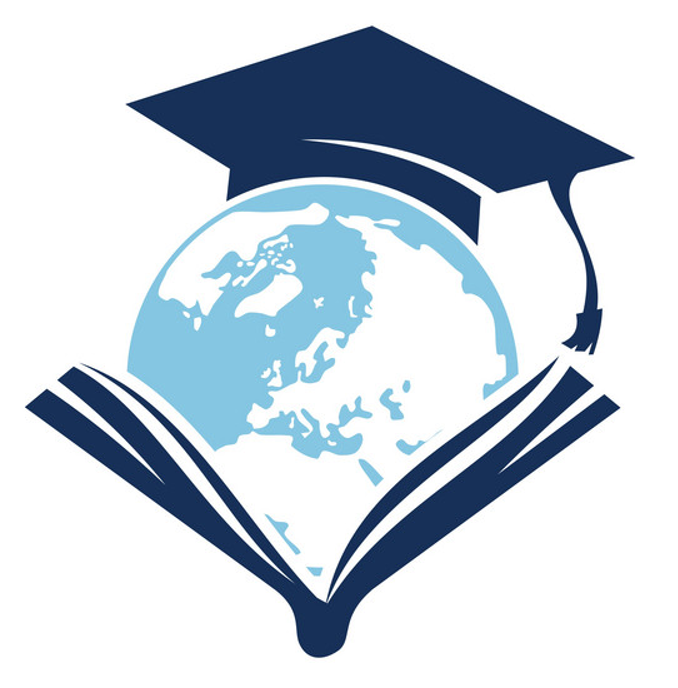

education


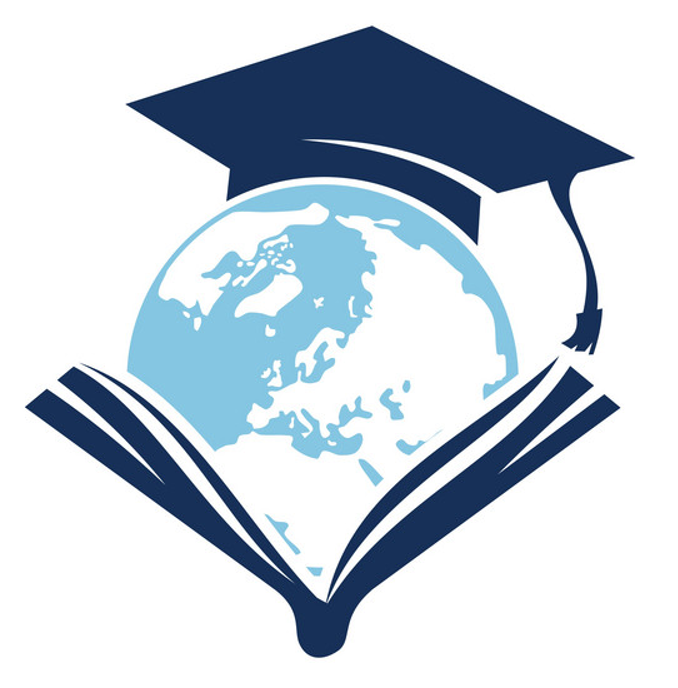

education


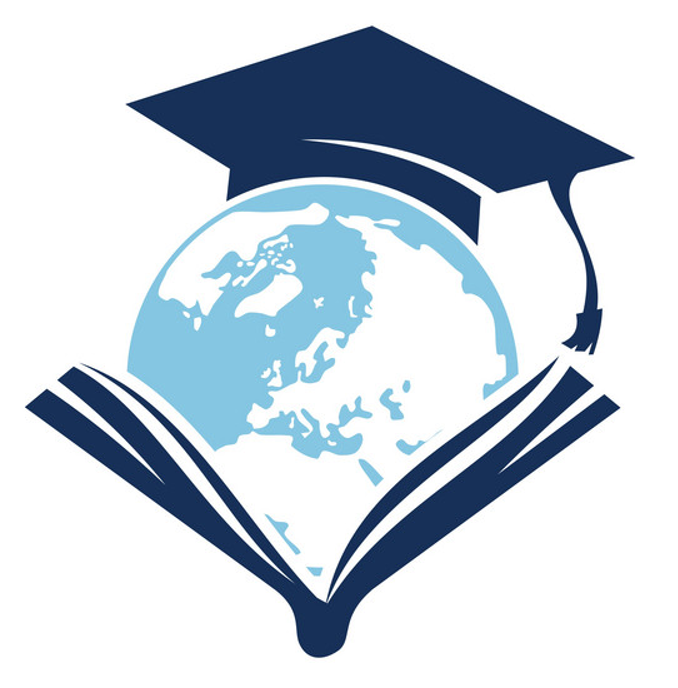

animals


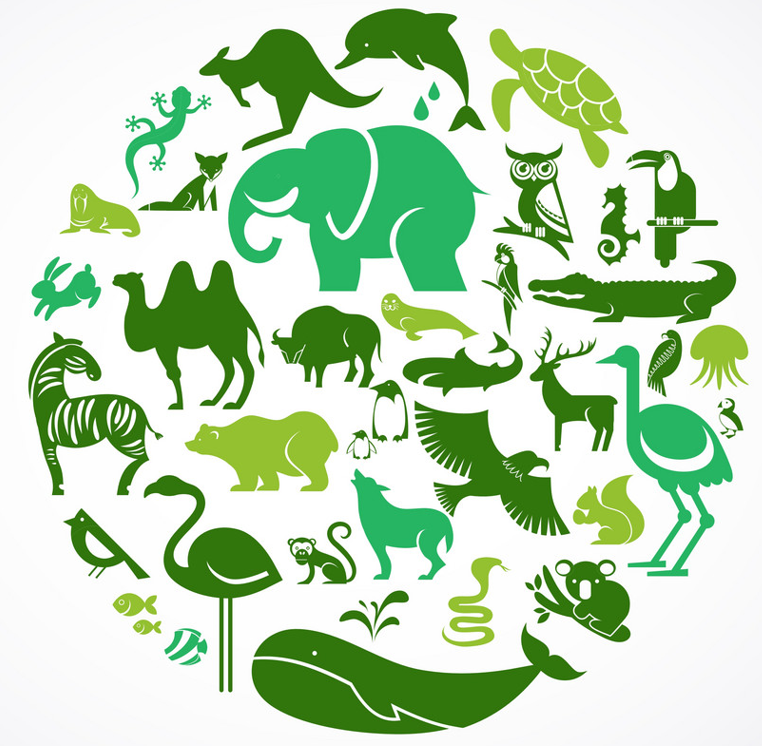

animals


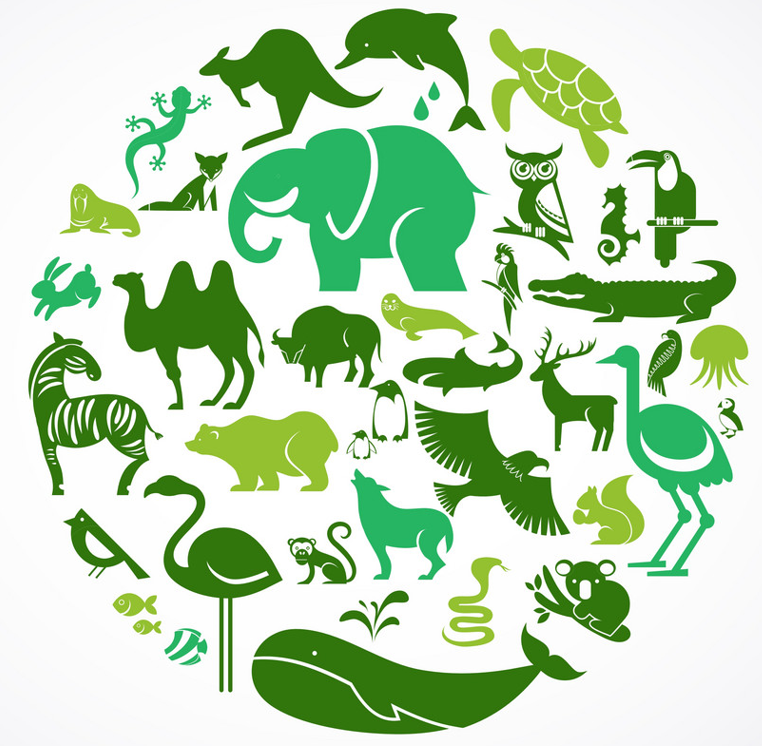

environment


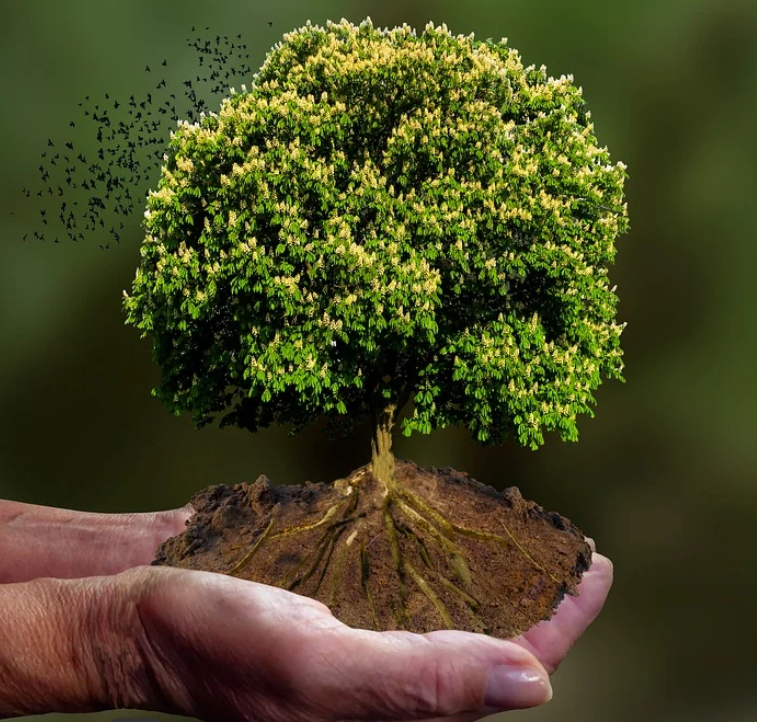

animals


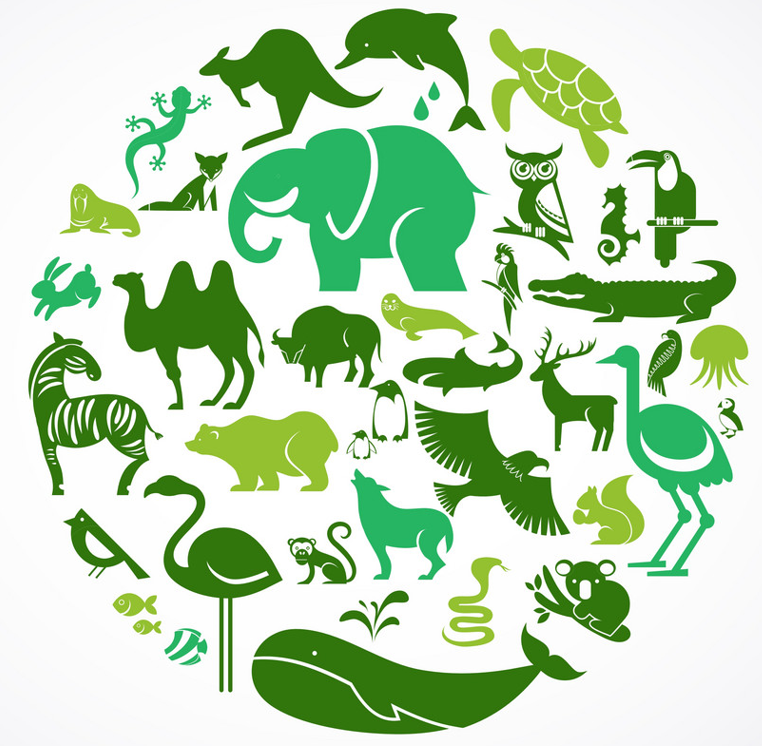

arts culture humanities


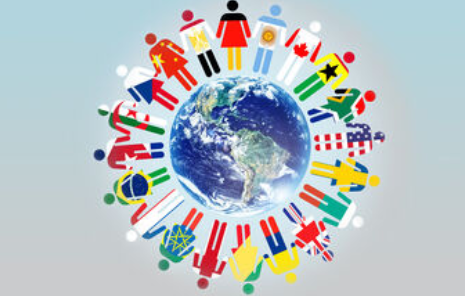

In [ ]:
from PIL import Image
import IPython.display as display
results = NB_pipeline.predict([children_str, education_str, education_str_edited, og_education_str, museum_str, environment_str, animals_str, arts_cult_hum_str])
for i in results:
  print(target_to_category[i])
  if i == 0:
    display.display(Image.open('animals_.png'))
  elif i == 1:
    display.display(Image.open('arts_culture_humanities.png'))
  elif i == 2:
    display.display(Image.open('community_development.png'))
  elif i == 3:
    display.display(Image.open('education_.png'))
  elif i == 4:
    display.display(Image.open('environment.png'))

education


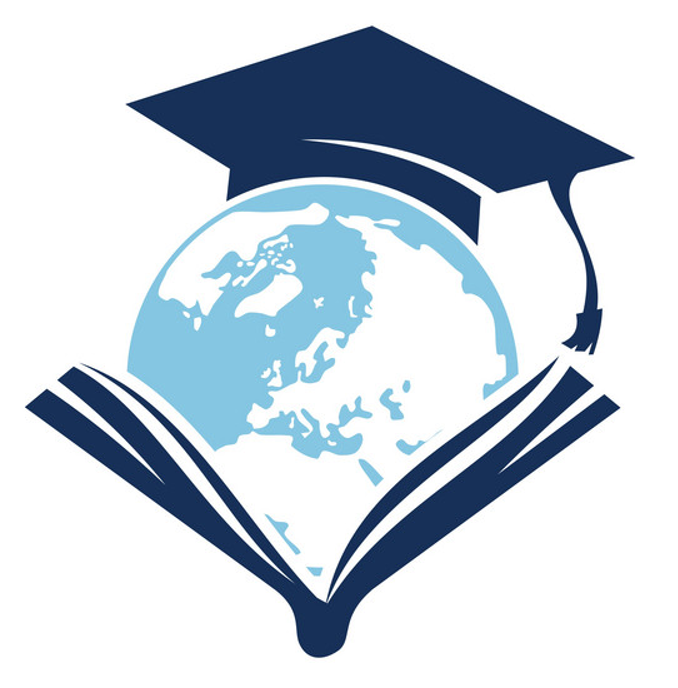

In [ ]:
results = SGD_pipeline.predict([education_str])
for i in results:
  print(target_to_category[i])
  if i == 0:
    display.display(Image.open('animals.jpg'))
  elif i == 1:
    display.display(Image.open('arts_culture_humanities.png'))
  elif i == 2:
    display.display(Image.open('community_development.png'))
  elif i == 3:
    display.display(Image.open('education_.png'))
  elif i == 4:
    display.display(Image.open('environment.png'))

In [ ]:
results = SGD_pipeline.predict([children_str, education_str, education_str_edited, og_education_str, museum_str, environment_str, animals_str, arts_cult_hum_str])
for i in results:
  print(target_to_category[i])

education
education
education
environment
arts culture humanities
environment
animals
arts culture humanities


In [ ]:
results = SVC_pipeline.predict([children_str, education_str, education_str_edited, og_education_str, museum_str, environment_str, animals_str, arts_cult_hum_str])
for i in results:
  print(target_to_category[i])

education
education
education
environment
arts culture humanities
environment
animals
arts culture humanities


In [ ]:
results = RF_pipeline.predict([children_str, education_str, education_str_edited, og_education_str, museum_str, environment_str, animals_str, arts_cult_hum_str])
for i in results:
  print(target_to_category[i])

environment
education
education
environment
arts culture humanities
environment
environment
arts culture humanities


In [ ]:
results = LR_pipeline.predict([children_str, education_str, education_str_edited, og_education_str, museum_str, environment_str, animals_str, arts_cult_hum_str])
for i in results:
  print(target_to_category[i])

education
education
education
environment
arts culture humanities
environment
animals
arts culture humanities


## Webdata

In [ ]:
web_df.head(100)

Number     Category                                            Content
0        1      Animals  The world's last male white rhino is almost ce...
1        1      Animals  Animal welfare for travelers: How to enjoy wil...
2        1      Animals  New standards in animal welfare raise new issu...
3        1      Animals  Never mind CCTV in slaughterhouses - we need t...
4        1      Animals  China: Yulin Dog Meat Festival Canceled, Say A...
..     ...          ...                                                ...
95       4  Environment  How One Country Is Restoring Its Damaged Ocean...
96       4  Environment  The Sahara is growing, thanks in part to clima...
97       4  Environment  Could New York City Parks Be Going Plastic Bot...
98       4  Environment  Drilling Near Dinosaur National Monument Draws...
99       4  Environment  Opinion | Bigger Is Not Better for Ocean Conse...

[100 rows x 3 columns]

In [ ]:
my_data = np.array([[article.text, '0'], [article.summary, '1'], [article.summary, '2']])
test_column_names = ['corpus', 'target']
test_df = pd.DataFrame(data=my_data, columns=test_column_names)
print(test_df)

                                              corpus target
0  Thiruvananthapuram: The revenue collection in ...      0
1  Thiruvananthapuram: The revenue collection in ...      1
2  Thiruvananthapuram: The revenue collection in ...      2


In [ ]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
test_df['clean_corpus']= test_df['corpus'].apply(lambda x:remove_punctuation(x))
test_df.head()

corpus target  \
0  Thiruvananthapuram: The revenue collection in ...      0   
1  Thiruvananthapuram: The revenue collection in ...      1   
2  Thiruvananthapuram: The revenue collection in ...      2   

                                        clean_corpus  
0  Thiruvananthapuram The revenue collection in t...  
1  Thiruvananthapuram The revenue collection in t...  
2  Thiruvananthapuram The revenue collection in t...

In [ ]:
test_df.corpus[2]

'Thiruvananthapuram: The revenue collection in the museum and zoo , which was badly hit by Covid-19, bounced back to normal with the authorities recording Rs 1 cr collection in two-and-a-half months.Peak turnout during the festive season brought good money for the museum and zoo as the daily collection, which hovered around Rs 1-2 lakh, jumped to Rs 4 lakhs towards the last week of December.\nThe authorities recorded a cumulative collection of Rs 1.01 crore by the end of December.“In 2020, for an entire year we could collect only Rs 1.4 crore.\nThis year, we crossed 1 crore in just around 50 days,” museum and zoo director said Abu S.The revenue collection from parking also increased considerably with many visitors opting for private vehicles and parking of vehicles on museum compounds yielded good revenue.\nIn October last week, the daily collection from the art gallery, the museum and the zoo had picked up from Rs 64,310 to Rs 1,69,075 in less than a week.\nThe museum was equipped wit

In [ ]:
test_df.clean_corpus[2]

'Thiruvananthapuram The revenue collection in the museum and zoo  which was badly hit by Covid19 bounced back to normal with the authorities recording Rs 1 cr collection in twoandahalf monthsPeak turnout during the festive season brought good money for the museum and zoo as the daily collection which hovered around Rs 12 lakh jumped to Rs 4 lakhs towards the last week of December\nThe authorities recorded a cumulative collection of Rs 101 crore by the end of December“In 2020 for an entire year we could collect only Rs 14 crore\nThis year we crossed 1 crore in just around 50 days” museum and zoo director said Abu SThe revenue collection from parking also increased considerably with many visitors opting for private vehicles and parking of vehicles on museum compounds yielded good revenue\nIn October last week the daily collection from the art gallery the museum and the zoo had picked up from Rs 64310 to Rs 169075 in less than a week\nThe museum was equipped with attractive and informativ

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(test_df.clean_corpus, test_df.target,
                                                    test_size=1,)

In [ ]:
## Suport Vector
SVC_pipeline.fit(X_train, y_train)
predictionSVC = SVC_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,predictionSVC)))
print('\nCONFUSION MATRIX')
print(confusion_matrix(y_test, predictionSVC))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictionSVC))

Test accuracy is 0.0

CONFUSION MATRIX
[[0 0]
 [1 0]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
predictionSVC

In [ ]:
X_test

In [ ]:
df1 = pd.read_csv('webdata.csv')

In [ ]:
df1.head()

In [ ]:
df1.Category[69]

In [ ]:
df1.Content[69]

In [ ]:
my_data1 = np.array([[df1.Content[69], '0'], [df1.Content[72], '1'], [df1.Content[76], '2']])
test_column_names1 = ['corpus', 'target']
test_df1 = pd.DataFrame(data=my_data1, columns=test_column_names1)
print(test_df1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(test_df1.corpus, test_df1.target,
                                                    test_size=1,)

In [ ]:
SVC_pipeline.fit(X_train, y_train)
predictionSVC = SVC_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,predictionSVC)))
print('\nCONFUSION MATRIX')
print(confusion_matrix(y_test, predictionSVC))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictionSVC))

In [ ]:
predictionSVC

# Recommending charities.

The "charity_navigator.csv" dataset currently does not have any information useful for recommending charities. Here's a list of things that we think should be included in the dataset:

1. Name and contact information of the charity (associated with a particular charity ID
2. Metrics useful for sorting the charities of a given cause:
    a. Overall rating
    b. Finalcial rating
    c. Accountability and transperancy

The following code sorts a list of charities (of a given cause) on the basis of the above 3 metrics -- overall rating, financial rating and the rating foe accountability and transperancy.

Top 'n' (n is currently set to 3) charities in the 3 sorted lists are recommended.


In [ ]:
metrics = ['overall_rating', 'financial_rating', 'accountability_and_transperancy_rating']

In [ ]:
def recommend_charities(metrics, cause, charity_data, n=3):

    """
    The following code sorts a list of charities (of a given cause) on the basis of the above 3 metrics -- overall rating, financial rating and the rating foe accountability and transperancy.

    Top 'n' (n is currently set to 3) charities in the 3 sorted lists are recommended.
    """

    top_charities = {}

    for metric in metrics:
        top_charities[metric] = charity_data.groupby(cause).sort_values(by=[metric]).head(n).copy()
    

    return top_charities
